In [43]:
#dataset preprocessing
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
#dataset Preparation
def datasetPrep(path):
  df = pd.read_csv(path)
  #print(df)
  #dataset visualization
  Features=df.columns 
  print(Features)
  sns.FacetGrid(df,hue=Features[-1],size=5).map(plt.scatter,Features[1],Features[2]).add_legend()
  #preparing the trainning and testing dataset
  X=df.iloc[:,0:-1]
  y=df.iloc[:,-1]
  target_names=y.unique()
  target_names=list(map(str,target_names))
  print(target_names)
  sc = StandardScaler()
  #scalling the dataset
  X = sc.fit_transform(X)
  #splitting the dataset into training and testing
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  return X_train, X_test, y_train, y_test, target_names
def evaluation(y_pred, y_test,target_names):
  #confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  sns.heatmap(cm, annot=True)
  #printing the accuracy
  acc=accuracy_score(y_test, y_pred)
  print ("Accuracy : ",acc )
  #printing the classification report

  print(target_names)
  report=classification_report(y_test, y_pred, target_names=target_names)
  print(report)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


['0', '1']
[[257   0]
 [143   0]]
Accuracy :  0.6425
['0', '1']
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       257
           1       0.00      0.00      0.00       143

    accuracy                           0.64       400
   macro avg       0.32      0.50      0.39       400
weighted avg       0.41      0.64      0.50       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

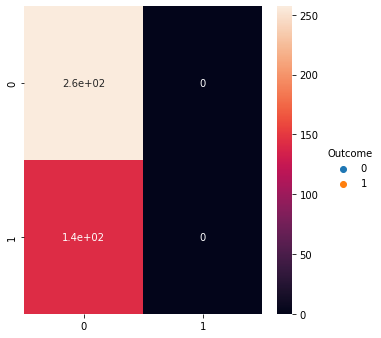

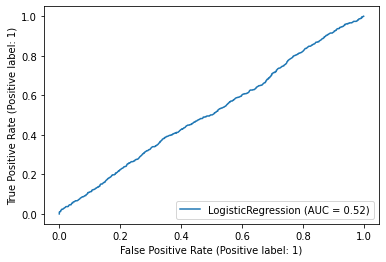

In [44]:
#Logistic Regression
path="/content/germany.csv"
X_train, X_test, y_train, y_test,target_names=datasetPrep(path)
#Training and testing the model
from sklearn.linear_model import LogisticRegression
# Create Decision Tree classifer object
model =LogisticRegression()
# Train Decision Tree Classifer
model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
evaluation(y_pred, y_test,target_names)
plot_roc_curve(model, X_train,y_train )

Index(['Index', 'sepallength', 'sepalwidth', 'petallength', 'petalwidth',
       'class'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
[[12  0  0]
 [ 0 14  0]
 [ 0  0  4]]
Accuracy :  1.0
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



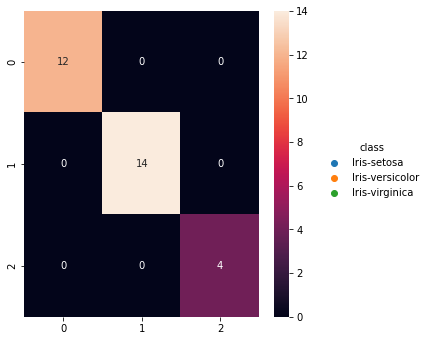

In [41]:
#Multinomial Logistic Regression
path="/content/iris.csv"
X_train, X_test, y_train, y_test, target_names=datasetPrep(path)
#Training and testing the model
from sklearn.linear_model import LogisticRegression
# Create Decision Tree classifer object
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Train Decision Tree Classifer
model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
evaluation(y_pred, y_test, target_names)